# 05 Interpolating Rasters

In case the digital elevation model of a simple geological map needs to be interpolated from topographic contours, several methods have been implemented in GemGIS. These include the methods ```nearest```, ```cubic``` and ```linear``` of ```scipy.interpolate.griddata``` and ```Rbf``` of ```scipy.interpolate.rbf```. The different methods can be accessed by passing the argument ```method= 'method_name'```. More information about the interpolation methods can be found [here](https://docs.scipy.org/doc/scipy/reference/interpolate.html).

<img src="../images/tutorial05_cover.png">

## Set File Paths and download Tutorial Data

If you downloaded the latest `GemGIS` version from the Github repository, append the path so that the package can be imported successfully. Otherwise, it is recommended to install `GemGIS` via `pip install gemgis` and import `GemGIS` using `import gemgis as gg`. In addition, the file path to the folder where the data is being stored is set. The tutorial data is downloaded using Pooch (https://www.fatiando.org/pooch/latest/index.html) and stored in the specified folder. Use `pip install pooch` if Pooch is not installed on your system yet.

In [1]:
import gemgis as gg

file_path ='data/05_interpolating_rasters/'

In [2]:
gg.download_gemgis_data.download_tutorial_data(filename="05_interpolating_rasters.zip", dirpath=file_path)

## Loading Data

In [3]:
import geopandas as gpd

contours = gpd.read_file(file_path + 'topo.shp')

contours.head()

,id,Z,geometry
0,None,400,"LINESTRING (0.74088 475.44101, 35.62873 429.24..."
1,None,300,"LINESTRING (645.96500 0.52496, 685.14093 61.86..."
2,None,400,"LINESTRING (490.29223 0.52496, 505.75641 40.73..."
3,None,600,"LINESTRING (911.43347 1068.58451, 908.85610 10..."
4,None,700,"LINESTRING (228.43207 1068.58451, 239.77247 10..."


## Plotting Data

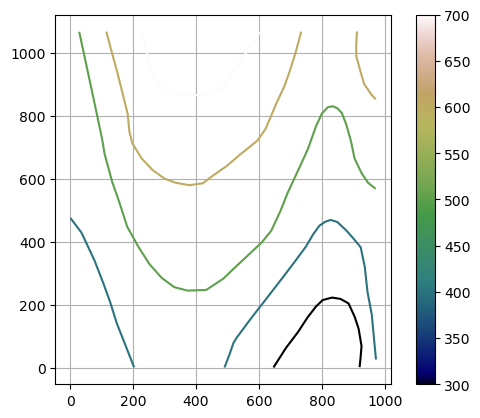

In [4]:
import matplotlib.pyplot as plt

contours.plot(aspect='equal',column='Z', cmap='gist_earth', legend=True)
plt.grid()

## Interpolating the Raster

It is recommended to use the method `rbf` for the interpolation of contour lines. More information about RBF can be found [here in this paper](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/JB076i008p01905).

In [5]:
raster = gg.vector.interpolate_raster(gdf=contours,
                                      method='rbf')
raster[:2]

array([[393.56371914, 393.50838517, 393.45386851, ..., 396.15856133,
        398.11421775, 400.06334288],
       [393.41982945, 393.36494644, 393.31088433, ..., 396.20694282,
        398.16690286, 400.12027997]])

## Plotting the interpolated raster

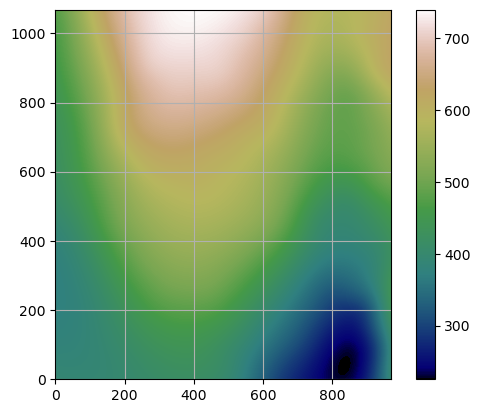

In [6]:
im = plt.imshow(raster, cmap='gist_earth', origin='lower')
plt.grid()
plt.colorbar(im)

## Interpolating the Raster

Using different interpolation functions such as `nearest` will result in different, more unrealistic results.

In [7]:
raster = gg.vector.interpolate_raster(gdf=contours,
                                      method='nearest')

## Plotting the interpolated raster

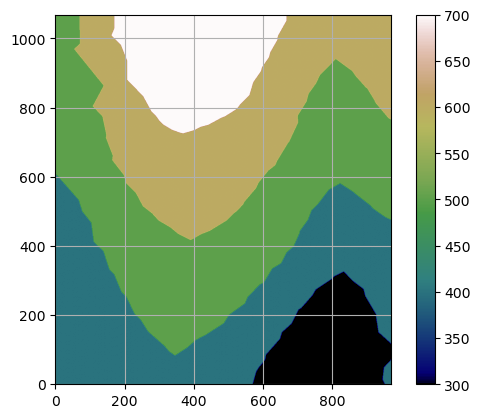

In [8]:
im = plt.imshow(raster, cmap='gist_earth', origin='lower')
plt.grid()
plt.colorbar(im)

## Additional Arguments

Several additional arguments can be passed to adapt the functionality of the function. For further reference, see the [API Reference for extract_xy](https://gemgis.readthedocs.io/en/latest/api_reference/vector_data.html).

* n - Number of points, default all
* res - Resolution of the interpolated raster, default 1
* extent - Extent of the interpolated raster, default according to the input data
* seed - seed for drawing random values
* kwargs - optional keyword arguments for rbf and griddata interpolation functions - https://docs.scipy.org/doc/scipy/reference/interpolate.html